In [3]:
library(hexView)
library(AER)
library(lmtest)
library(ggplot2)
library(car)
library(carData)
library(strucchange)
library(fBasics)

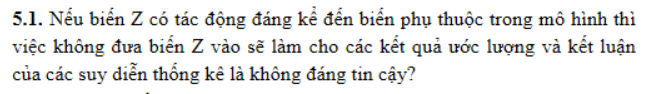

Nếu biến Z đó không có tương quan với các biến độc lập trong mô hình, thì giả thiết 2 không bị vi phạm. Nên mô hình tốt

Nếu Z tương quan với các biến độc lập trong mô hình thì lúc này kết quả không đáng tin cậy

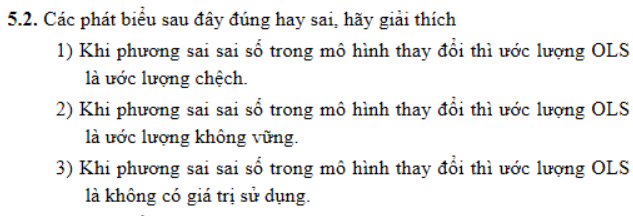

1) Sai. Vì chỉ phương sai của hệ số ước lượng bị chệch. Còn kỳ vọng của các hệ số thì không

2)
- Ta có $var(\hat \beta_j)<\frac{\sigma^2_{\max}}{nvar(X_j)}\Rarr \lim_{n\rarr\infty}var(\hat\beta_j)\le0$ 
- Và $E(\hat \beta_j)=\beta_j$

3) Sai. Các ước lượng hệ số vẫn là không chệch. vững. Khoảng tin cậy là không có giá trị sử dụng (Dùng ước lượng điểm)

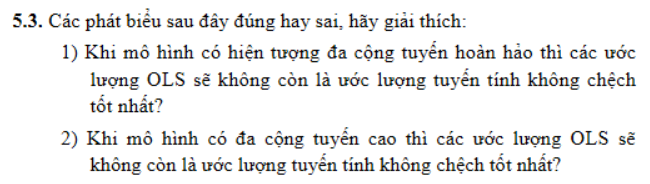

1) Đúng
2) Đa cộng tuyến cao làm phương sai ước lượng lớn

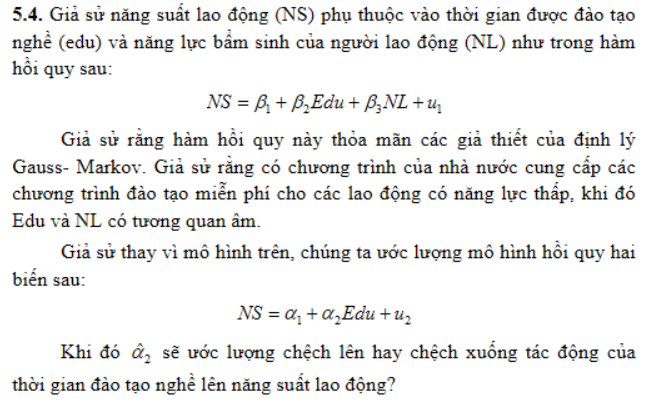

Chệch xuống

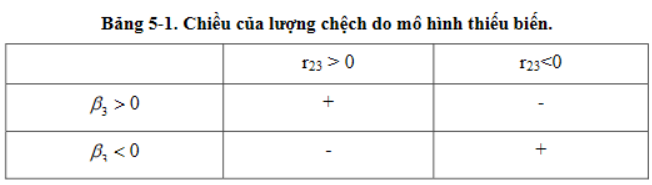

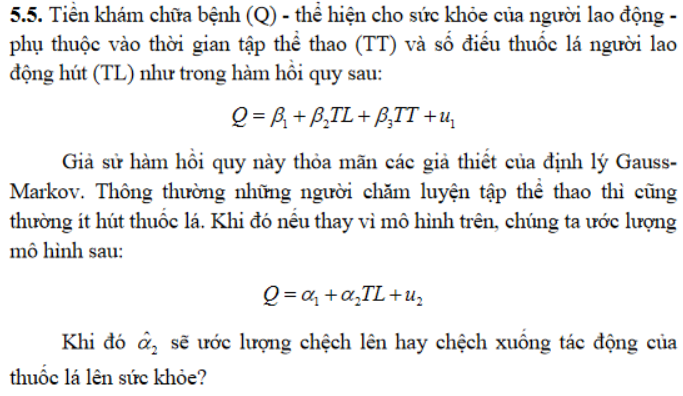

Chệch lên

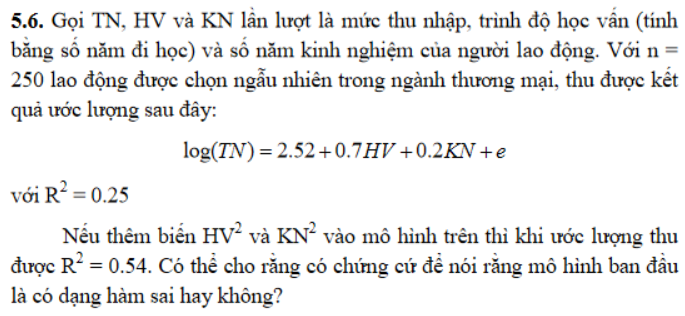

Có. Vì khi bổ sung thêm biến thấy $R^2$ tăng, nên dạng hàm có dạng bậc 2

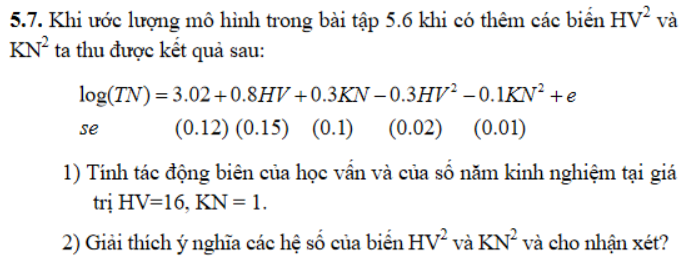

1) 
- $\frac{\partial \log(TN)}{\partial HV}=0.8-0.3\times 2\times HV$
- $\frac{\partial \log(TN)}{\partial KN}=0.3-0.1\times 2\times KN$

2)
- Khi học vấn và số năm kinh nghiệm tăng thì mức tăng của thu nhập giảm dần

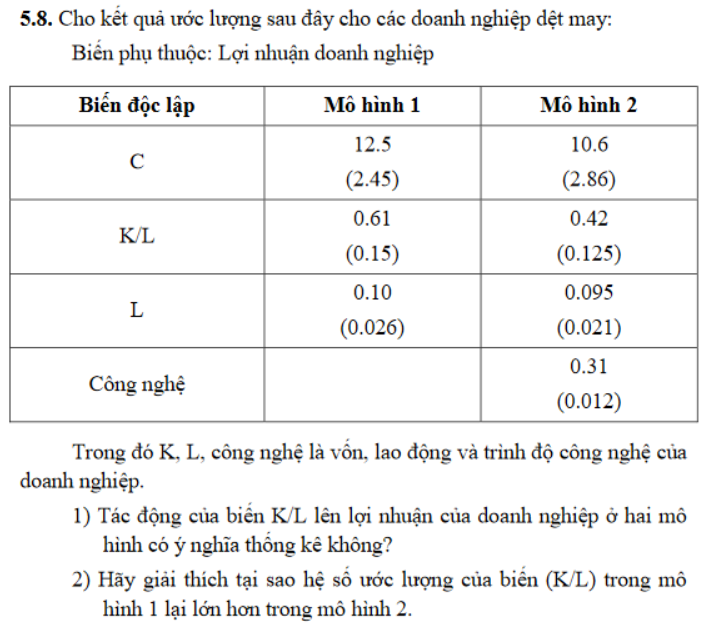

1) $\frac{0.61}{0.15}\approx  4\Rarr$ Có ý nghĩa thống kê
2) Bỏ biến công nghệ làm cho bị chệch lên

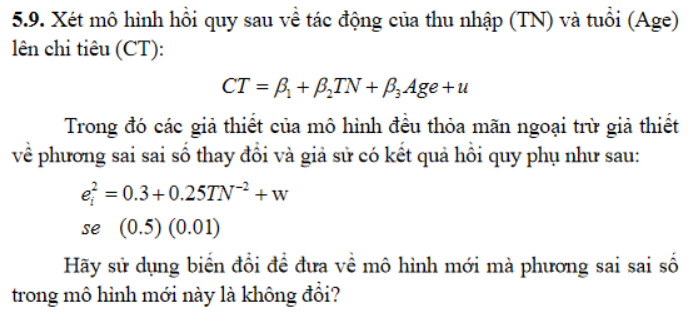

Nhân thêm TN

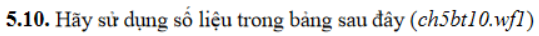
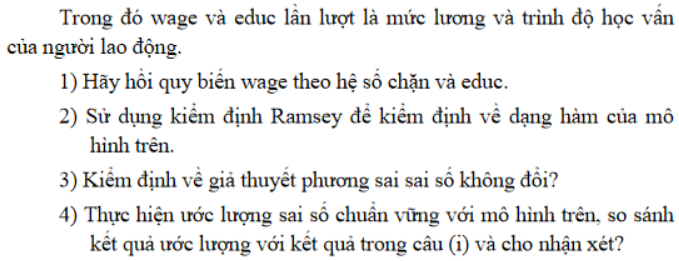

In [4]:
b10 <- readEViews("ch5bt10.WF1")

Warning message in readEViews("ch5bt10.WF1"):
"Skipping boilerplate variable
"
Warning message in readEViews("ch5bt10.WF1"):
"Skipping boilerplate variable
"


In [5]:
names(b10)

[1] "Date"  "AGE"   "EDUC"  "MEDUC" "SSIBS" "WAGE"

##### 1

In [6]:
hq <- lm(data=b10,WAGE~EDUC)
summary(hq)


Call:
lm(formula = WAGE ~ EDUC, data = b10)

Residuals:
   Min     1Q Median     3Q    Max 
-790.6 -387.1  165.3  249.6  467.1 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2344.82     440.88   5.318 9.48e-06 ***
EDUC           73.67      33.17   2.221    0.034 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 354.5 on 30 degrees of freedom
Multiple R-squared:  0.1412,	Adjusted R-squared:  0.1126 
F-statistic: 4.933 on 1 and 30 DF,  p-value: 0.03405


##### 2

In [7]:
resettest(hq, power = c(2,3))


	RESET test

data:  hq
RESET = 0.32029, df1 = 2, df2 = 28, p-value = 0.7286


Mô hình có dạng hàm đúng

##### 3

In [8]:
b10$phandu <- resid(hq)
summary(lm(data = b10, phandu ~ EDUC+I(EDUC^2)))


Call:
lm(formula = phandu ~ EDUC + I(EDUC^2), data = b10)

Residuals:
   Min     1Q Median     3Q    Max 
-815.2 -391.4  190.8  263.4  403.8 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  1930.58    2543.19   0.759    0.454
EDUC         -290.91     378.82  -0.768    0.449
I(EDUC^2)      10.74      13.93   0.771    0.447

Residual standard error: 356.9 on 29 degrees of freedom
Multiple R-squared:  0.02008,	Adjusted R-squared:  -0.0475 
F-statistic: 0.2972 on 2 and 29 DF,  p-value: 0.7451


Không có phương sai sai số thay đổi

##### 4

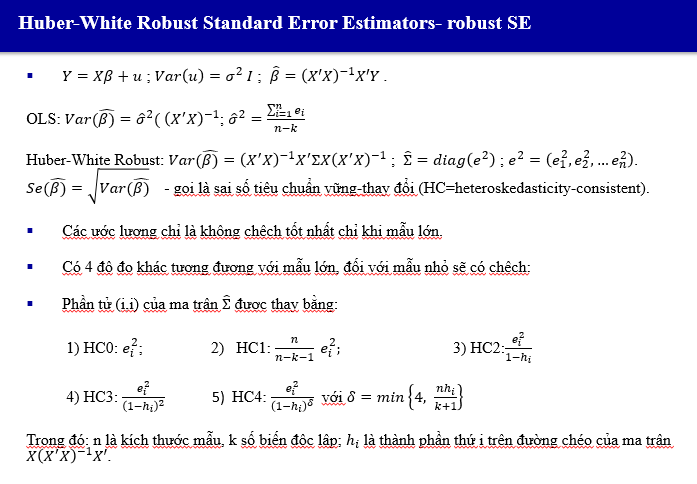

In [10]:
library(sandwich())
vcovHC(hq,
  type = c("HC3", "const", "HC", "HC0", "HC1", "HC2", "HC4", "HC4m", "HC5"),
  omega = NULL, sandwich = TRUE)


,(Intercept),EDUC
(Intercept),303518.51,-22879.253
EDUC,-22879.25,1749.403


https://search.r-project.org/CRAN/refmans/sandwich/html/vcovHC.html

In [13]:
meatHC(hq, type =  "HC", omega = NULL)

,(Intercept),EDUC
(Intercept),117822.9,1560708
EDUC,1560708.1,21221555


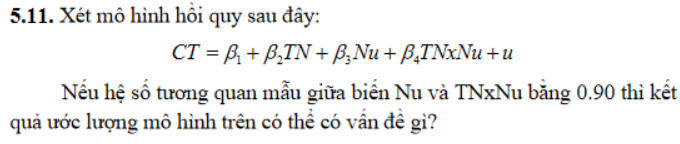

Khoảng tin cậy kém tin cậy hơn